In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# --- 1. Load the Dataset ---
# Make sure the 'kidney_disease_dataset.csv' file is in the same directory as the script.
try:
    df = pd.read_csv('kidney_disease_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'kidney_disease_dataset.csv' not found.")
    print("Please make sure the dataset file is in the correct directory.")
    exit()


Dataset loaded successfully.


In [3]:
# --- 2. Define Variables ---
# Define the dependent variable (DV) and independent variables (IVs).
dependent_var = 'GFR'
independent_vars_all = ['Serum_Creatinine', 'Proteinuria', 'BUN']


Generating scatter plots...


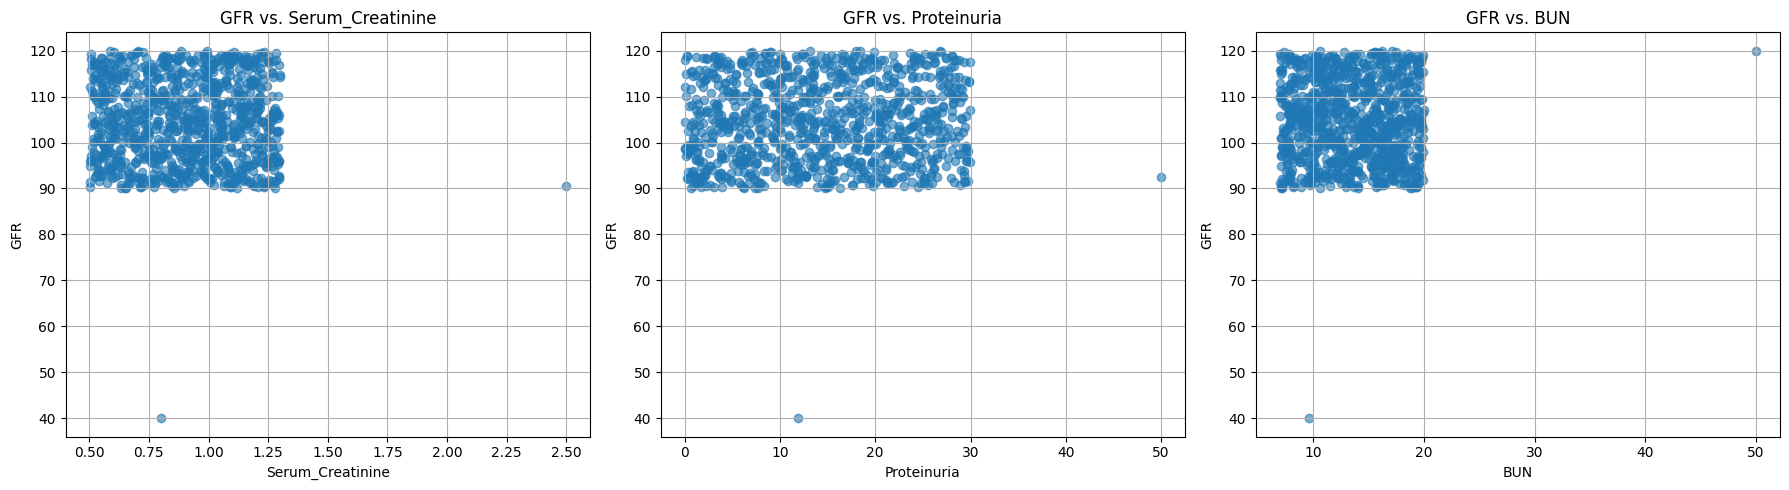

In [4]:
# --- 3. Create and Save Scatter Diagrams ---
print("Generating scatter plots...")
plt.figure(figsize=(18, 5)) # Create a figure to hold the subplots

for i, iv in enumerate(independent_vars_all):
    plt.subplot(1, 3, i + 1) # Create a subplot for each IV
    plt.scatter(df[iv], df[dependent_var], alpha=0.6)
    plt.title(f'{dependent_var} vs. {iv}')
    plt.xlabel(iv)
    plt.ylabel(dependent_var)
    plt.grid(True)

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.savefig('scatter_plots_gfr.png')
plt.show()
plt.close()

In [5]:
# --- 4. Construct and Analyze Regression Models ---
print("\n--- Building and Evaluating Regression Models ---")

# Define the model configurations
models_to_run = {
    'Model 1 (All IVs)': ['Serum_Creatinine', 'Proteinuria', 'BUN'],
    'Model 2 (Serum_Creatinine, Proteinuria)': ['Serum_Creatinine', 'Proteinuria'],
    'Model 3 (Serum_Creatinine, BUN)': ['Serum_Creatinine', 'BUN'],
    'Model 4 (Proteinuria, BUN)': ['Proteinuria', 'BUN']
}

# Store results for comparison
model_results = {}

# Loop through and run each model
for name, ivs in models_to_run.items():
    print(f"\n--- Analyzing {name} ---")

    # Select the data for the model
    y = df[dependent_var]
    X = df[ivs]
    X = sm.add_constant(X) # Add an intercept (constant) to the model

    # Fit the Ordinary Least Squares (OLS) model
    model = sm.OLS(y, X).fit()

    # Store the results
    model_results[name] = {
        'adj_r_squared': model.rsquared_adj,
        'model_summary': model.summary()
    }

    # Print the summary for each model
    print(model.summary())



--- Building and Evaluating Regression Models ---

--- Analyzing Model 1 (All IVs) ---
                            OLS Regression Results                            
Dep. Variable:                    GFR   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6197
Date:                Wed, 15 Oct 2025   Prob (F-statistic):              0.602
Time:                        14:02:18   Log-Likelihood:                -3604.1
No. Observations:                1000   AIC:                             7216.
Df Residuals:                     996   BIC:                             7236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [6]:
# --- 5. Compare Models and Select the Best One ---
print("\n--- Model Comparison (Adjusted R-squared) ---")
best_model_name = ''
best_adj_r2 = -1

for name, results in model_results.items():
    adj_r2 = results['adj_r_squared']
    print(f"{name}: {adj_r2:.4f}")
    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_model_name = name

print(f"\nBest Model: {best_model_name} with an Adjusted R-squared of {best_adj_r2:.4f}")

print("\n--- Coefficient Hypothesis Testing for the Best Model ---")
print(f"The full summary for the best model ({best_model_name}) is shown above.")
print("To perform hypothesis testing, look at the 'P>|t|' column for each coefficient.")
print("A p-value less than 0.05 indicates a statistically significant relationship.")



--- Model Comparison (Adjusted R-squared) ---
Model 1 (All IVs): -0.0011
Model 2 (Serum_Creatinine, Proteinuria): -0.0001
Model 3 (Serum_Creatinine, BUN): -0.0019
Model 4 (Proteinuria, BUN): -0.0002

Best Model: Model 2 (Serum_Creatinine, Proteinuria) with an Adjusted R-squared of -0.0001

--- Coefficient Hypothesis Testing for the Best Model ---
The full summary for the best model (Model 2 (Serum_Creatinine, Proteinuria)) is shown above.
To perform hypothesis testing, look at the 'P>|t|' column for each coefficient.
A p-value less than 0.05 indicates a statistically significant relationship.


In [7]:
# --- 6. Forecast Using the Best Model ---
print("\n--- Forecasting with the Best Model ---")

# Get the independent variables for the best model
best_model_ivs = models_to_run[best_model_name]

# Create a new data point using the mean of the best model's IVs
# This is for demonstration; you can replace .mean() with specific values.
new_data_point = df[best_model_ivs].mean().to_dict()
new_data_point_with_const = sm.add_constant(pd.DataFrame([new_data_point]), has_constant='add')


print("Forecasting for new data point (using mean values):")
print(new_data_point)

# Re-fit the best model to make a prediction
y = df[dependent_var]
X = sm.add_constant(df[best_model_ivs])
best_model_fit = sm.OLS(y, X).fit()

# Predict the GFR for the new data point
predicted_gfr = best_model_fit.predict(new_data_point_with_const)

print(f"\nPredicted GFR: {predicted_gfr.iloc[0]:.4f}")


--- Forecasting with the Best Model ---
Forecasting for new data point (using mean values):
{'Serum_Creatinine': 0.9016635691733554, 'Proteinuria': 14.4561021785603}

Predicted GFR: 104.6183
